## Programas para el apartado 6


#### Descripción del programa en C:

El programa apartado6.c tiene todas las cosas básicas del algoritmo (parte del apartado1.c). He añadido una función que calcula la fluctuación de una partícula con respecto de su posición inicial en cada instante de tiempo.

La fluctuación se define como el desplazamiento al cuadrado.

Además tenemos que ir multiplicando la velocidad por 1.5 en los instantes de tiempo: 20, 30, 35 y 45. Esto simula un aumento de la temperatura para ver el cambio de fase. 

Este programa dejará dos archivos, fluctuaciontodas.txt y fluctuacionuna.txt. El fichero fluctuaciontodas.txt contiene la media aritmetica de las fluctuaciones de todas las partículas para cada instante de tiempo. El fichero fluctuacionuna.txt contiene la fluctuación de cada partícula con respecto a su posición inicial.


#### Descripción del programa en python:

El programa 5.1 lee el fichero fluctuacionuna.txt y plotea esos datos. Plotea solo los de una partícula que tienes que especificar.

El programa 5.2 es como el 5.1 pero agrupa todas las particulas para hacer un video.

El programa 5.3 lee el fichero fluctuaciontodas.txt y plotea esos datos. Hay muchos puntos por los que solo se plotea la curva.


### 1º Programa: animar N partículas para una caja de lado L

Este programa sirva para hacer la animación de todas las partículas dentro de la caja. Para ello cojemos los datos de posiciones.txt y lo ploteamos. El programa pondrá un punto en cada posición y con un paso temporal lo suficientemente pequeño lo veremos continuo.

Este programa es visual, podemos observar la atracción pero sobretodo la repulsión de las partículas entre ellas.

Para ello defino una función que lea el archivo en cuestión (posiciones.txt) y otra función que las anime.

Con copilot (a parte de ayudarme con las autocompletaciones y comentarios) he implementado una opción para hacer video o gif, según el tiempo que tenga para hacer el ploteo de la animación.

NECESITA:

- posiciones.txt
- N
- L

Suelta:

- simulacion_N_L.mp4 o un gif.


C:\Users\diego\AppData\Local\Temp\ipykernel_1332\3691924720.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Video guardado como 'simulacion_N16_L4.0.mp4'.


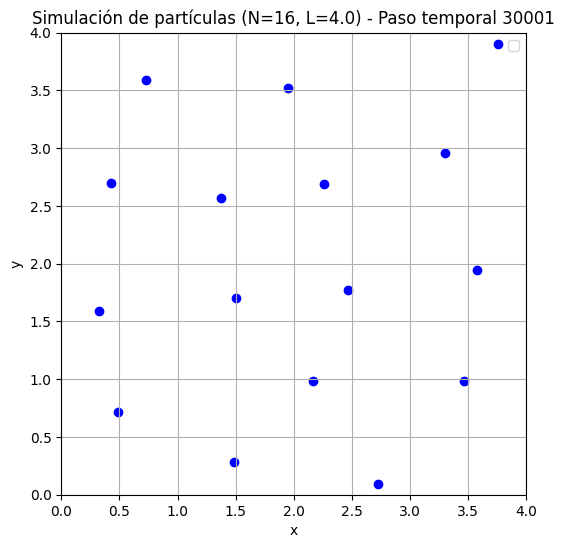

In [5]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=4.0
N=16



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  

        for linea in file:
            linea = linea.strip()
            if linea:  
                datos = linea.split(",")  
                r1x, r1y = float(datos[0]), float(datos[1])  
                paso_actual.append((r1x, r1y))
            else:  
                if paso_actual:  
                    posiciones.append(paso_actual)
                    paso_actual = []  

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Simulación de partículas (N={N}, L={L})")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)


    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Simulación de partículas (N={N}, L={L}) - Paso temporal {frame + 1}")


    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.gif", writer=gif_writer)
        print(f"GIF guardado como 'simulacion_N{N}_L{L}.gif'.")

    # Guardar como video
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save(f"simulacion_N{N}_L{L}.mp4", writer=video_writer)
        print(f"Video guardado como 'simulacion_N{N}_L{L}.mp4'.")

    plt.show()

# Uso el programa
if __name__ == "__main__":
    archivo = "SALIDA.txt"  
    posiciones = leer_posiciones(archivo)


    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

### 2º Programa: Ploteo de energía


#### 2.1 Ploteo fijo de la energía

Este programa coge los datos de energia.txt y plotea 3 curvas, la energía cinética, potencial y total.
Toma solo una imagen por lo que es increblemente rápido.

Necesita:
- energia.txt
- N
- L

Suelta:
- Energia_N_L.png

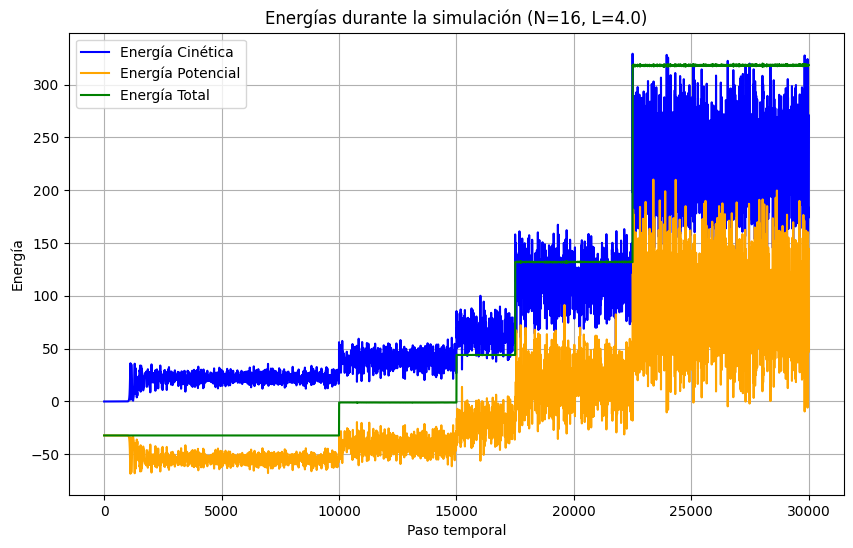

In [1]:
# PLOT DE ENERGIA


#PON LAS DIMENSIONES

L=4.0
N=16

import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title(f"Energías durante la simulación (N={N}, L={L})")  # Título con N y L
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Energia_N{N}_L{L}.png")  # Nombre del archivo con N y L
    plt.show()



##############   LO USAMOS       ####################

if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

### Programa 5: Medir la fluctuación de las partículas.

#### 5.1 Programa para 1 sola partícula

Este programa coge los datos de fluctuacionuna.txt y plotea esos datos, que son la distancia de la partícula con respecto a su posición inicial.

Necesita:
- fluctuacionuna.txt

Suelta:
- fluctuacion_particula_{particula}.png

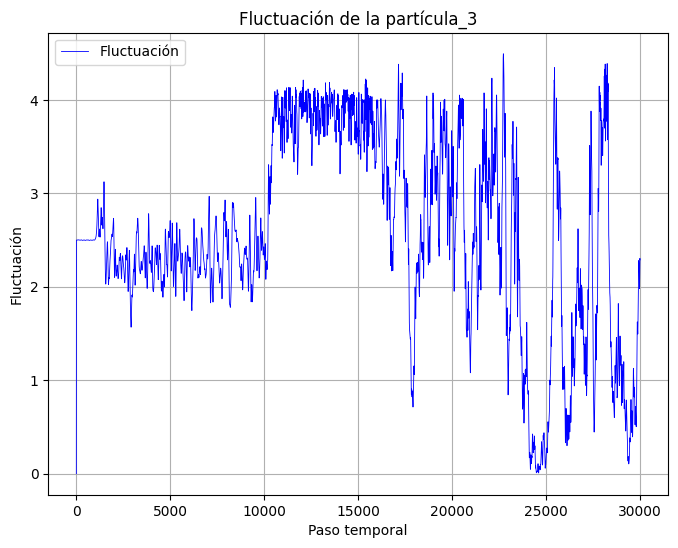

In [3]:
# APARTADO 6: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES.

#ELIGE LA PARTICULA

part=3

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, color='blue',linewidth=0.6, label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title(f'Fluctuación de la partícula_{part}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"fluctuacion_particula_{part}.png")
    plt.show()

###### LO USAMOS ######
if __name__ == "__main__":
    archivo = "fluctuacionuna.txt"  
    particula = part  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

##### Análisis de 5.1

Si ignoramos la parte inicial podemos asumir que la posición inicial se encuentra entorno al 6.5. De ahí al llegar al paso 10000 obtenemos un salto bruto de posición, que es ucuando variamos por primera vez la velocidad. Cuando variamos la velocidad hay uno o varios saltos de este estilo.  Sobretodo cuando llegamos al final que se encuentra el salto más grande.

#### 5.2 Fluctuación de cada partícula agrupadas en un vídeo.

Este programa realiza los plots de todas las partículas y los agrupa en un vídeo.

Necesita:
- fluctuacionuna.txt

Suelta:
- fluctuaciones_iniciales.mp4

In [ ]:
# APARTADO 6: VIDEO DE LAS FLUCTUACIONES.

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def leer_fluctuaciones_por_particula(filename):
    """
    Lee el archivo y devuelve una lista de listas, donde cada sublista contiene
    la fluctuación de una partícula a lo largo del tiempo.
    """
    fluctuaciones_por_particula = []
    with open(filename, 'r') as file:
        paso = []
        for linea in file:
            linea = linea.strip()
            if linea:
                paso.append(float(linea))
            else:
                if paso:
                    fluctuaciones_por_particula.append(paso)
                    paso = []
        if paso:
            fluctuaciones_por_particula.append(paso)
    # Transponer: ahora cada sublista es una partícula
    return list(map(list, zip(*fluctuaciones_por_particula)))

def crear_video_fluctuaciones(fluctuaciones, output="fluctuaciones_particulas.mp4"):
    """
    Crea un video donde cada frame es el plot de la fluctuación de una partícula.
    """
    num_particulas = len(fluctuaciones)
    num_pasos = len(fluctuaciones[0])

    fig, ax = plt.subplots(figsize=(8, 6))
    linea, = ax.plot([], [], color='blue')
    ax.set_xlabel('Paso temporal')
    ax.set_ylabel('Fluctuación')
    ax.set_xlim(1, num_pasos)
    ax.set_ylim(min(min(f) for f in fluctuaciones), max(max(f) for f in fluctuaciones))
    titulo = ax.set_title('')

    def actualizar(i):
        linea.set_data(range(1, num_pasos + 1), fluctuaciones[i])
        titulo.set_text(f'Fluctuación de la partícula {i+1}')
        return linea, titulo

    anim = FuncAnimation(fig, actualizar, frames=num_particulas, blit=False, repeat=False)
    writer = FFMpegWriter(fps=2)
    anim.save(output, writer=writer)
    plt.close(fig)
    print(f"Vídeo guardado como {output}")

if __name__ == "__main__":
    fluctuaciones = leer_fluctuaciones_por_particula("fluctuacionuna.txt")
    crear_video_fluctuaciones(fluctuaciones)

#### 5.3 Fluctuación media.

Este programa usa fluctuaciontodas.txt y hace lo mismo programa anterior pero hace la media para cada valor.

Necesita:
- fluctuaciontodas.txt

Suelta:
- fluctuacion_media.png

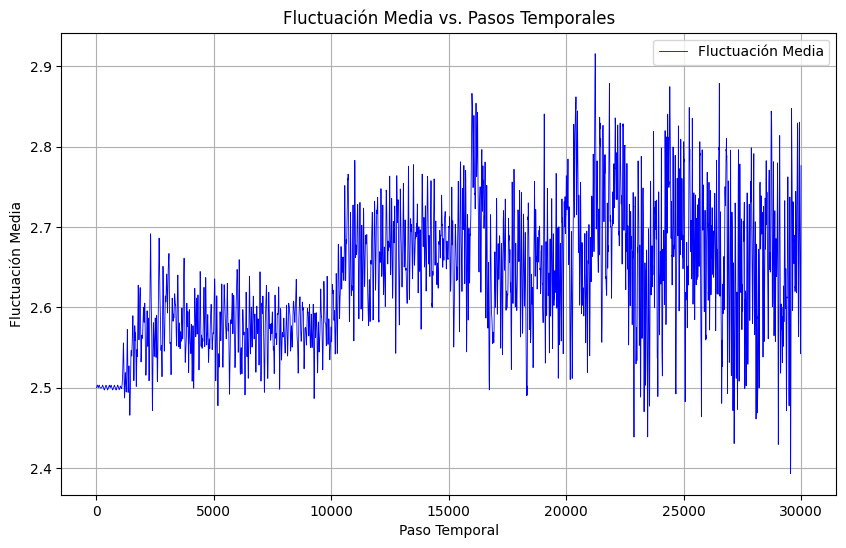

In [4]:
# APARTADO 6: FLUCTUACION MEDIA

import matplotlib.pyplot as plt

def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones desde un archivo de texto.

    Args:
        filename (str): Ruta del archivo a leer.

    Returns:
        list: Lista de fluctuaciones leídas del archivo.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        for linea in file:
            fluctuaciones.append(float(linea.strip()))
    return fluctuaciones

def plot_fluctuaciones(fluctuaciones):
    """
    Genera un gráfico de fluctuaciones con respecto a los pasos temporales.

    Args:
        fluctuaciones (list): Lista de fluctuaciones.
    """
    pasos = range(1, len(fluctuaciones) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(pasos, fluctuaciones, color='blue', linewidth=0.6, label='Fluctuación Media')
    plt.xlabel('Paso Temporal')
    plt.ylabel('Fluctuación Media')
    plt.title('Fluctuación Media vs. Pasos Temporales')
    plt.legend()
    plt.grid(True)
    plt.savefig("fluctuacion_media.png")  # Guarda el gráfico como imagen
    plt.show()

if __name__ == "__main__":
    archivo = "fluctuaciontodas.txt"
    fluctuaciones = leer_fluctuaciones(archivo)
    plot_fluctuaciones(fluctuaciones)


##### Análisis del 5.3

De nuevo, después de la primera parte que es más o menos estable, cuando aumentamos la velocidad es cuando empiezan las fluctuaciones grandes. Es el cuadrado de la fluctuación por lo que esta en realidad es más pequeña.

Aún así, se puede ver claramente cuando es que aumentamos la temperatura, ya que cada vez comienza a oscilar más y más.